# Description

Started as a example to generate heatmaps and a list of correlation matrices, it was further developed to perform specific analysis on my persona data. Some aspects of this, the import, heatmap, and flattended corelation list, are reusable or can be adapted to any data set.

# Import Python Libraries

## Visualization / Heatmap Libraries

In [1]:
#%matplotlib notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Dataframe and Math Function Libraries

In [2]:
from __future__ import print_function
import numpy as np
import pandas as pd
#!pip install --upgrade pip
#!pip install xlrd

# Load Data And Explore

## Google Download (eventually API)

This code uses a single file fromGoogle's Fit downlad, a summary file that is aggegated from the other files. Download yor Google Fit data from the following link, https://takeout.google.com/, and then reference the summary file in the Import section.

## Import

In [3]:
import os
os_name = os.sys.platform

fileName = '2022-04-18 Daily Summaries.csv'
#Mac Path
if os_name == 'darwin':
    filePath = '/Users/igoeja/Documents/GitHub/DataAnalytics/Data/' + fileName
else:
    filePath = 'c:\\Users\\igoej\\OneDrive\\Documents\\GitHub\\DataAnalytics\\Data\\' + fileName

df_fit = pd.read_csv(filePath)
df_fit.tail()

,Date,Move Minutes count,Average blood glucose (mmol/L),Max blood glucose (mmol/L),Min blood glucose (mmol/L),Temporal relation to meal,Meal type,Temporal relation to sleep,Blood glucose specimen source,Average systolic blood pressure (mmHg),...,Elliptical duration (ms),Rowing duration (ms),Rowing machine duration (ms),Treadmill running duration (ms),Cross-country skiing duration (ms),Stair climbing machine duration (ms),Strength training duration (ms),Ergometer duration (ms),Other duration (ms),Guided breathing duration (ms)
3191,2022-04-14,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3192,2022-04-15,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3193,2022-04-16,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2016115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3194,2022-04-17,286.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9806547.0,NaN,NaN,NaN,NaN,NaN
3195,2022-04-18,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Review

Uncomment lines to examine aspects of the data set

In [4]:
#df_fit.head()

In [5]:
#df_fit.info()

In [6]:
df_fit.describe()

,Move Minutes count,Average blood glucose (mmol/L),Max blood glucose (mmol/L),Min blood glucose (mmol/L),Temporal relation to meal,Meal type,Temporal relation to sleep,Average systolic blood pressure (mmHg),Max systolic blood pressure (mmHg),Min systolic blood pressure (mmHg),...,Elliptical duration (ms),Rowing duration (ms),Rowing machine duration (ms),Treadmill running duration (ms),Cross-country skiing duration (ms),Stair climbing machine duration (ms),Strength training duration (ms),Ergometer duration (ms),Other duration (ms),Guided breathing duration (ms)
count,1499.000000,624.000000,624.00000,624.000000,0.0,0.0,0.0,153.000000,153.000000,153.000000,...,7.500000e+01,1.430000e+02,1.920000e+02,3.000000e+01,4.100000e+01,1.200000e+01,7.000000e+00,1.100000e+01,1.570000e+02,11.000000
mean,82.626418,7.831359,12.68109,3.840545,NaN,NaN,NaN,125.910135,127.000000,124.777778,...,2.312917e+06,2.572347e+06,2.175430e+06,1.984272e+06,1.677133e+06,1.035141e+06,1.323483e+06,2.010573e+06,1.784455e+06,103430.454545
std,52.350026,1.027450,1.93203,1.052189,NaN,NaN,NaN,7.758669,8.106203,8.171051,...,2.698469e+06,1.369680e+06,9.824882e+05,9.678893e+05,1.373121e+06,3.880041e+05,3.733149e+05,6.953297e+05,9.729297e+05,34583.122833
min,1.000000,2.630142,4.70000,0.100000,NaN,NaN,NaN,103.000000,103.000000,103.000000,...,1.240000e+05,2.000000e+03,6.300000e+01,8.444630e+05,2.456060e+05,5.433590e+05,8.402130e+05,1.209576e+06,2.270000e+05,68084.000000
25%,41.000000,7.188445,11.40000,3.200000,NaN,NaN,NaN,121.000000,122.000000,120.000000,...,1.193668e+06,1.667500e+06,1.539640e+06,1.298598e+06,1.280445e+06,7.268365e+05,1.038040e+06,1.439207e+06,9.000000e+05,100104.000000
50%,75.000000,7.775342,12.50000,3.800000,NaN,NaN,NaN,126.000000,127.000000,125.000000,...,1.905407e+06,2.462000e+06,2.121024e+06,1.681335e+06,1.561843e+06,9.440885e+05,1.388249e+06,1.697672e+06,1.637000e+06,100132.000000
75%,115.000000,8.456189,13.80000,4.400000,NaN,NaN,NaN,131.000000,132.000000,130.000000,...,2.585006e+06,3.435000e+06,2.605786e+06,2.458847e+06,1.805195e+06,1.333376e+06,1.576841e+06,2.550316e+06,2.695000e+06,100200.000000
max,374.000000,11.059582,21.60000,7.000000,NaN,NaN,NaN,147.000000,153.000000,143.000000,...,1.987194e+07,6.520000e+06,9.370067e+06,4.245107e+06,9.806547e+06,1.654967e+06,1.806156e+06,3.310903e+06,4.638000e+06,200268.000000


In [7]:
#df_fit.describe(include='object')

# Shared Functions

## Correlation

In [8]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    return xFiltered

In [9]:
def corrFilterFlattened(x: pd.DataFrame, bound: float):
    xFiltered = corrFilter(x, bound)
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened


In [10]:
def filterForLabels(df: pd.DataFrame, label):  
    try:
        sideLeft = df[label,]
    except:
        sideLeft = pd.DataFrame()

    try:
        sideRight = df[:,label]
    except:
        sideRight = pd.DataFrame()

    if sideLeft.empty and sideRight.empty:
        return pd.DataFrame()
    elif sideLeft.empty:        
        concat = sideRight.to_frame()
        concat.rename(columns={0:'Corr'},inplace=True)
        return concat
    elif sideRight.empty:
        concat = sideLeft.to_frame()
        concat.rename(columns={0:'Corr'},inplace=True)
        return concat
    else:
        concat = pd.concat([sideLeft,sideRight], axis=1)
        concat["Corr"] = concat[0].fillna(0) + concat[1].fillna(0)
        concat.drop(columns=[0,1], inplace=True)
        return concat

## Basic

In [11]:
def MedianFunction(df, roundValue):
    import statistics as stat
    cleaned = df.dropna()
    return round(stat.median(cleaned), roundValue)

In [12]:
def AverageFunction(df, roundValue):
    cleaned = df.dropna()
    return round(sum(cleaned)/len(cleaned), roundValue)

# Data Clean and Prep

In [13]:
df_fit.dropna(axis=1, how='all', inplace=True)

# Google Specific Fixes

In [14]:
df_fit.set_index('Date')

,Move Minutes count,Average blood glucose (mmol/L),Max blood glucose (mmol/L),Min blood glucose (mmol/L),Blood glucose specimen source,Average systolic blood pressure (mmHg),Max systolic blood pressure (mmHg),Min systolic blood pressure (mmHg),Average diastolic blood pressure (mmHg),Max diastolic blood pressure (mmHg),...,Elliptical duration (ms),Rowing duration (ms),Rowing machine duration (ms),Treadmill running duration (ms),Cross-country skiing duration (ms),Stair climbing machine duration (ms),Strength training duration (ms),Ergometer duration (ms),Other duration (ms),Guided breathing duration (ms)
Date,,,,,,,,,,,,,,,,,,,,,
2012-09-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-14,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-15,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-16,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2016115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Set Aggregate Values

In [15]:
#df_fit['SleepSum'] = df_fit['Deep sleeping duration (ms)'] + df_fit['Light sleeping duration (ms)'] + df_fit['Sleep duration (ms)']
#df_fit['sleepSumHours'] = df_fit['SleepSum'] / 3600000

In [16]:
df_fit['basketballMinutes'] = df_fit['Basketball duration (ms)'] / 60000
df_fit['rowingMachineMinutes'] = df_fit['Rowing machine duration (ms)']/ 60000

## Lag/Shift Values

In [17]:
df_fit['rowingMachineMinutesShifted'] = df_fit['rowingMachineMinutes'].shift()
df_fit['moveMinutesCountShifted'] = df_fit['Move Minutes count'].shift()
df_fit['heartPointsShifted'] = df_fit['Heart Points'].shift()
df_fit['distanceShifted'] = df_fit['Distance (m)'].shift()
df_fit['basketballMinutesShifted'] = df_fit['basketballMinutes'].shift()


In [18]:
#df_fit.columns

# Create Correlation Heat Map and List

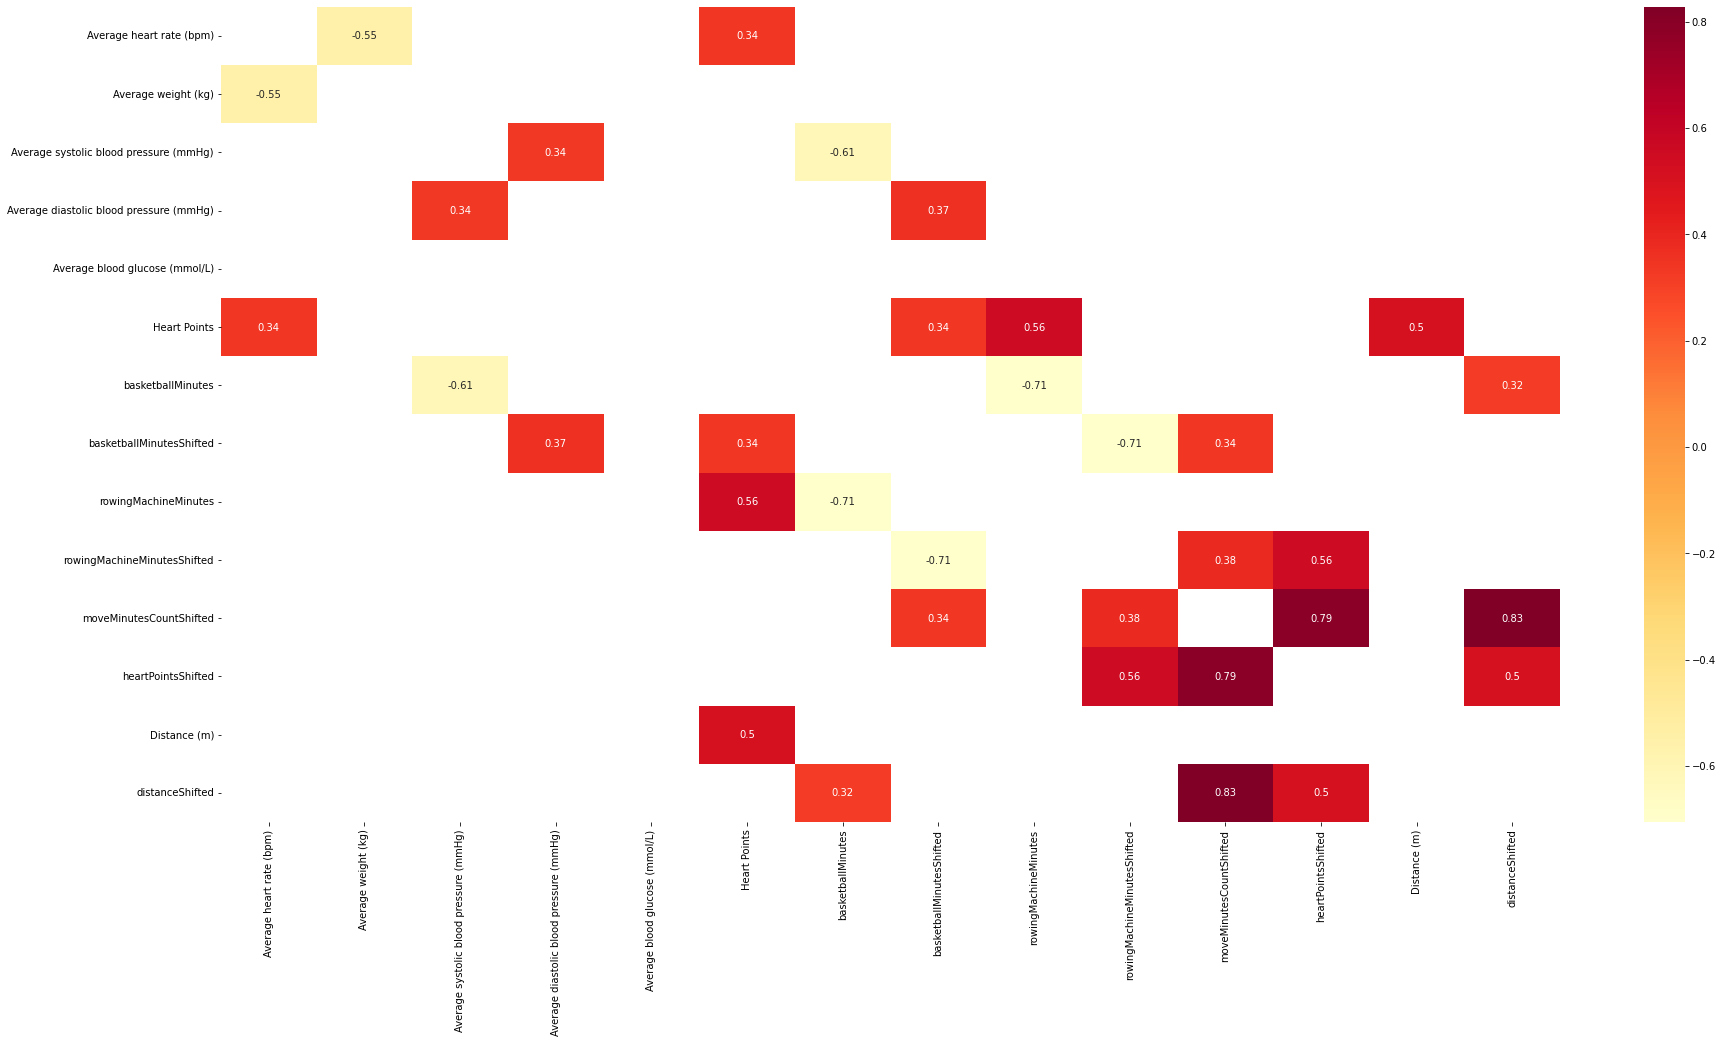

In [19]:
#set data set for analysis
df = df_fit[['Date', 'Average heart rate (bpm)','Average weight (kg)','Average systolic blood pressure (mmHg)','Average diastolic blood pressure (mmHg)','Average blood glucose (mmol/L)','Heart Points','basketballMinutes', 'basketballMinutesShifted', 'rowingMachineMinutes','rowingMachineMinutesShifted', 'moveMinutesCountShifted','heartPointsShifted','Distance (m)', 'distanceShifted']]
filterValue = 0.3
plt.figure(figsize=(30,15))
sns.heatmap(corrFilter(df, filterValue), annot=True, cmap="YlOrRd")
plt.show()

In [20]:
corr_fit_filtered = corrFilterFlattened(df, filterValue)
half = corr_fit_filtered.count() / 2
corr_fit_filtered

basketballMinutesShifted                 rowingMachineMinutesShifted              -0.705547
Average systolic blood pressure (mmHg)   basketballMinutes                        -0.613946
Average heart rate (bpm)                 Average weight (kg)                      -0.550570
distanceShifted                          basketballMinutes                         0.319891
Average diastolic blood pressure (mmHg)  Average systolic blood pressure (mmHg)    0.336781
Heart Points                             basketballMinutesShifted                  0.337191
                                         Average heart rate (bpm)                  0.337891
basketballMinutesShifted                 moveMinutesCountShifted                   0.341830
Average diastolic blood pressure (mmHg)  basketballMinutesShifted                  0.366380
moveMinutesCountShifted                  rowingMachineMinutesShifted               0.384846
Distance (m)                             Heart Points                           

# Measures

## Blood Pressure


In [21]:
filterForLabels(corr_fit_filtered, 'Average systolic blood pressure (mmHg)')

C:\Users\igoej\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:2940: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


,Corr
basketballMinutes,-0.613946
Average diastolic blood pressure (mmHg),0.336781


In [22]:
filterForLabels(corr_fit_filtered, 'Average diastolic blood pressure (mmHg)')

C:\Users\igoej\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:2940: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


,Corr
Average systolic blood pressure (mmHg),0.336781
basketballMinutesShifted,0.366380


In [23]:
dia = df['Average diastolic blood pressure (mmHg)']
sys = df['Average systolic blood pressure (mmHg)']
print('BP (avg):', AverageFunction(sys,1), '/', AverageFunction(dia,1))
print('BP (median):',MedianFunction(sys,1), '/', MedianFunction(dia,1))

BP (avg): 125.9 / 80.1
BP (median): 126.0 / 80.0


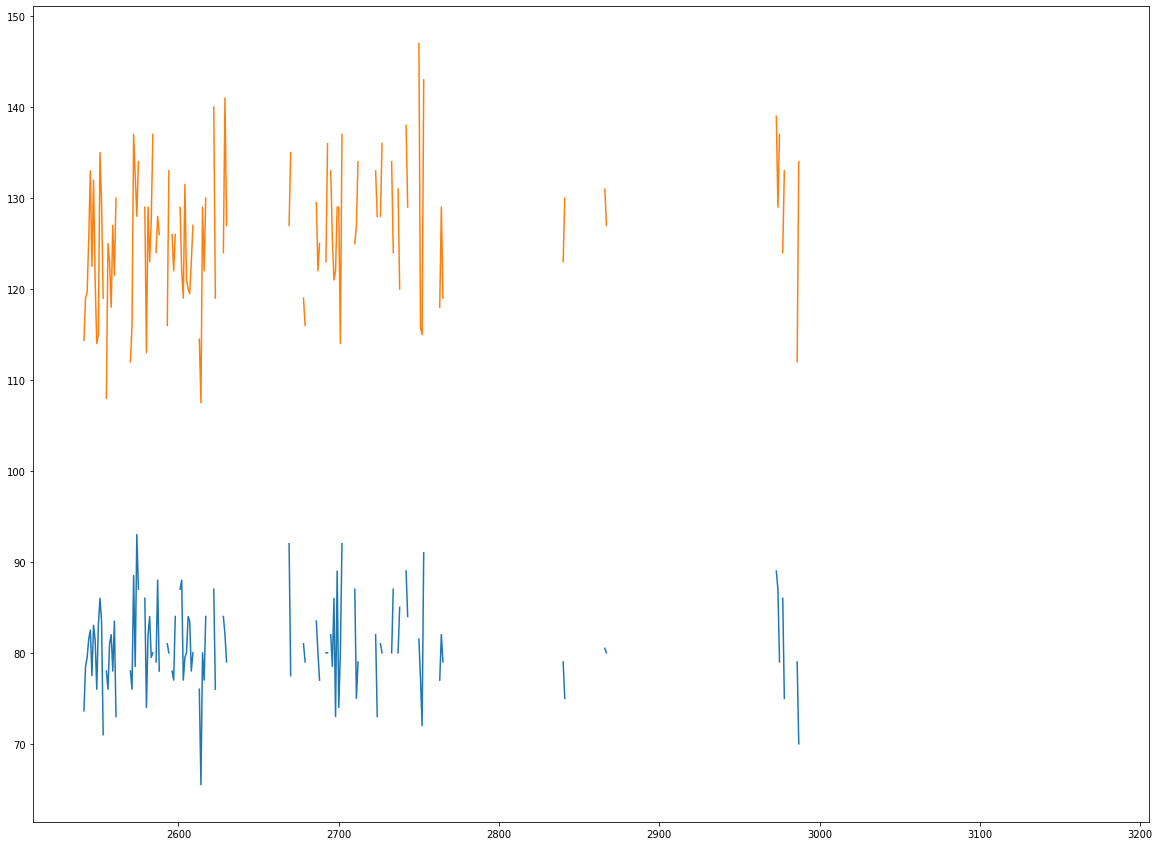

In [24]:
plt.figure(figsize=(20,15))
plt.plot(df.index, df['Average diastolic blood pressure (mmHg)'])
plt.plot(df.index, df['Average systolic blood pressure (mmHg)'])
plt.xlabel = 'None'
plt.show()


(100.0, 144.775)

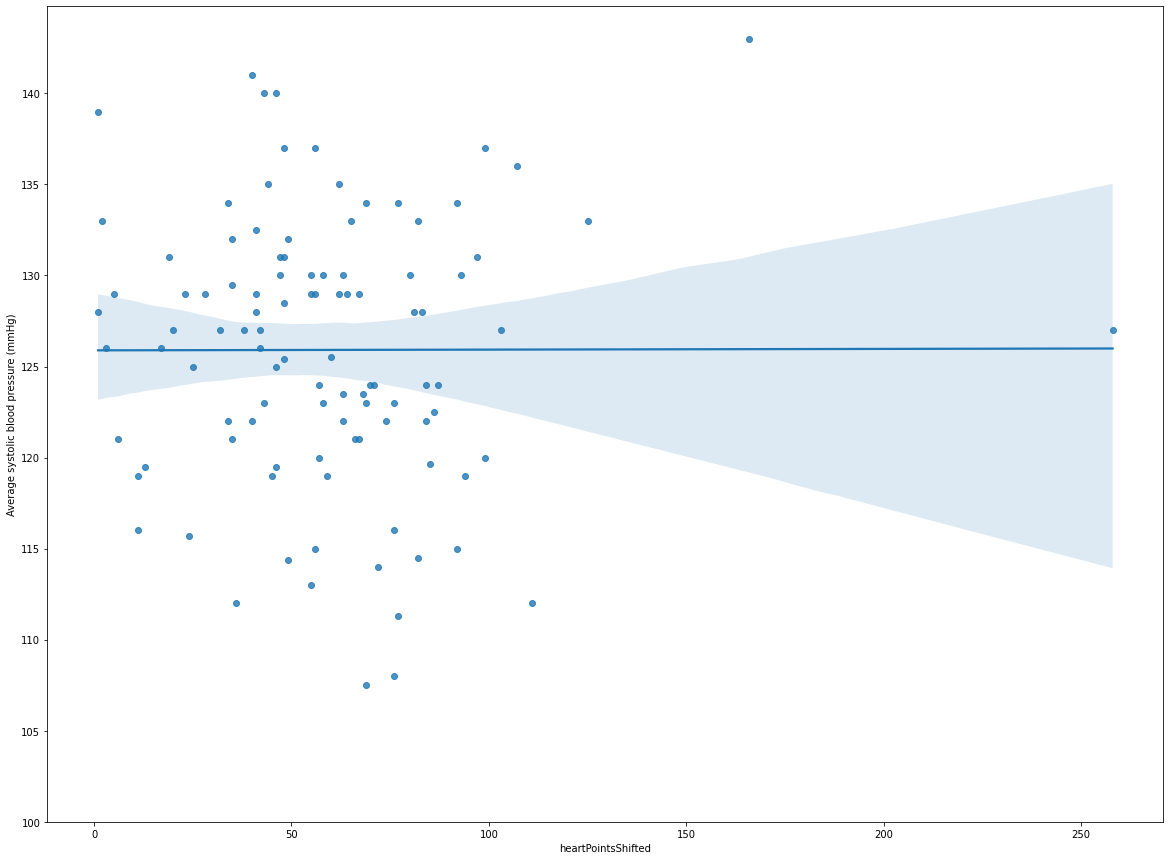

In [25]:
plt.figure(figsize=(20,15))
sns.regplot(x='heartPointsShifted', y='Average systolic blood pressure (mmHg)', data=df)
plt.ylim(100,)

## Glucose

In [26]:
filterForLabels(corr_fit_filtered, 'Average blood glucose (mmol/L)')

C:\Users\igoej\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:2940: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
C:\Users\igoej\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3357: PerformanceWarning: indexing past lexsort depth may impact performance.
  if (await self.run_code(code, result,  async_=asy)):


""


In [27]:
bg = df['Average blood glucose (mmol/L)']
bg2 = df['Average blood glucose (mmol/L)'] * 18.0
print('BG (mmol/L):', AverageFunction(bg, 1))
print('BG (mmg/dl):', round(AverageFunction(bg2, 1)))

BG (mmol/L): 7.8
BG (mmg/dl): 141


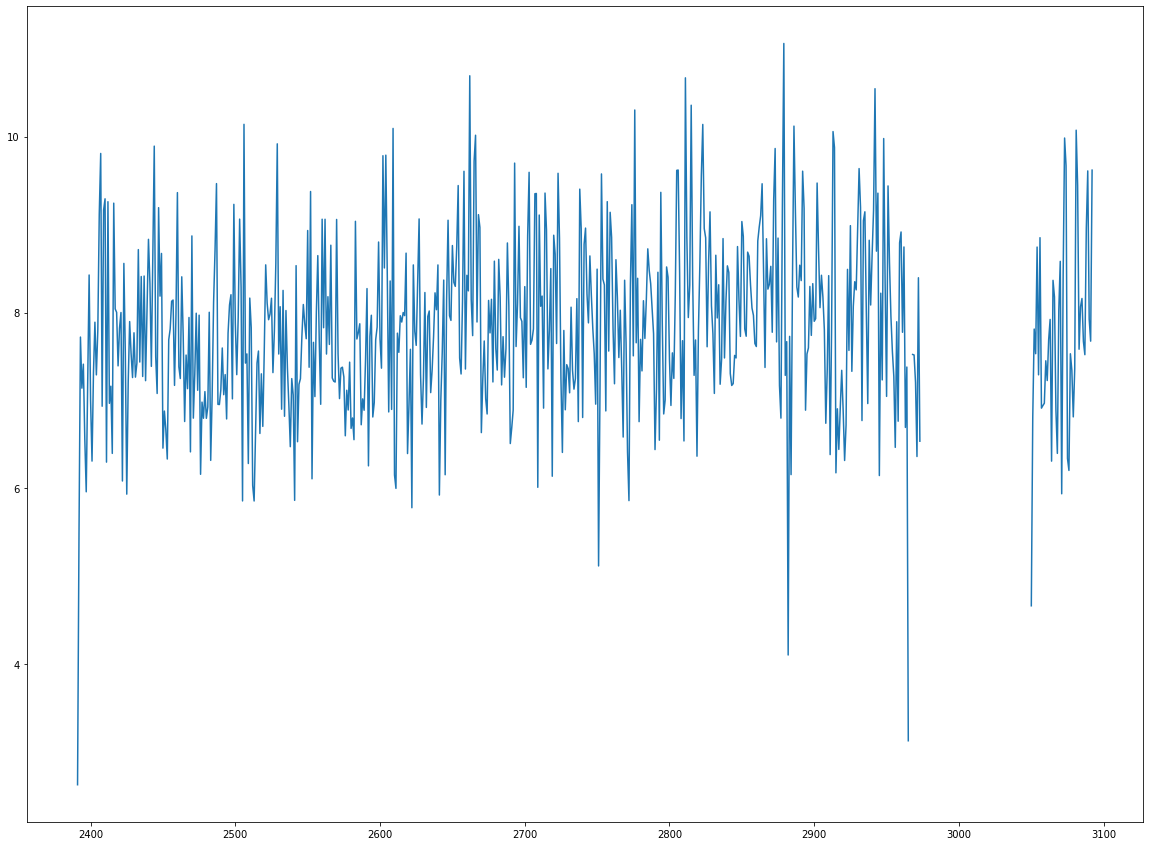

In [28]:
plt.figure(figsize=(20,15))
plt.plot(df.index, df['Average blood glucose (mmol/L)'])
plt.show()

## Weight

In [29]:
filterForLabels(corr_fit_filtered, 'Average weight (kg)')

C:\Users\igoej\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:2940: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
C:\Users\igoej\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3357: PerformanceWarning: indexing past lexsort depth may impact performance.
  if (await self.run_code(code, result,  async_=asy)):


,Corr
Average heart rate (bpm),-0.55057


In [30]:
w = df['Average weight (kg)']
print('Weight (kg):', AverageFunction(w, 1))
print('Weight (lbs):', round(AverageFunction(w, 1) * 2.2,1))


Weight (kg): 101.6
Weight (lbs): 223.5


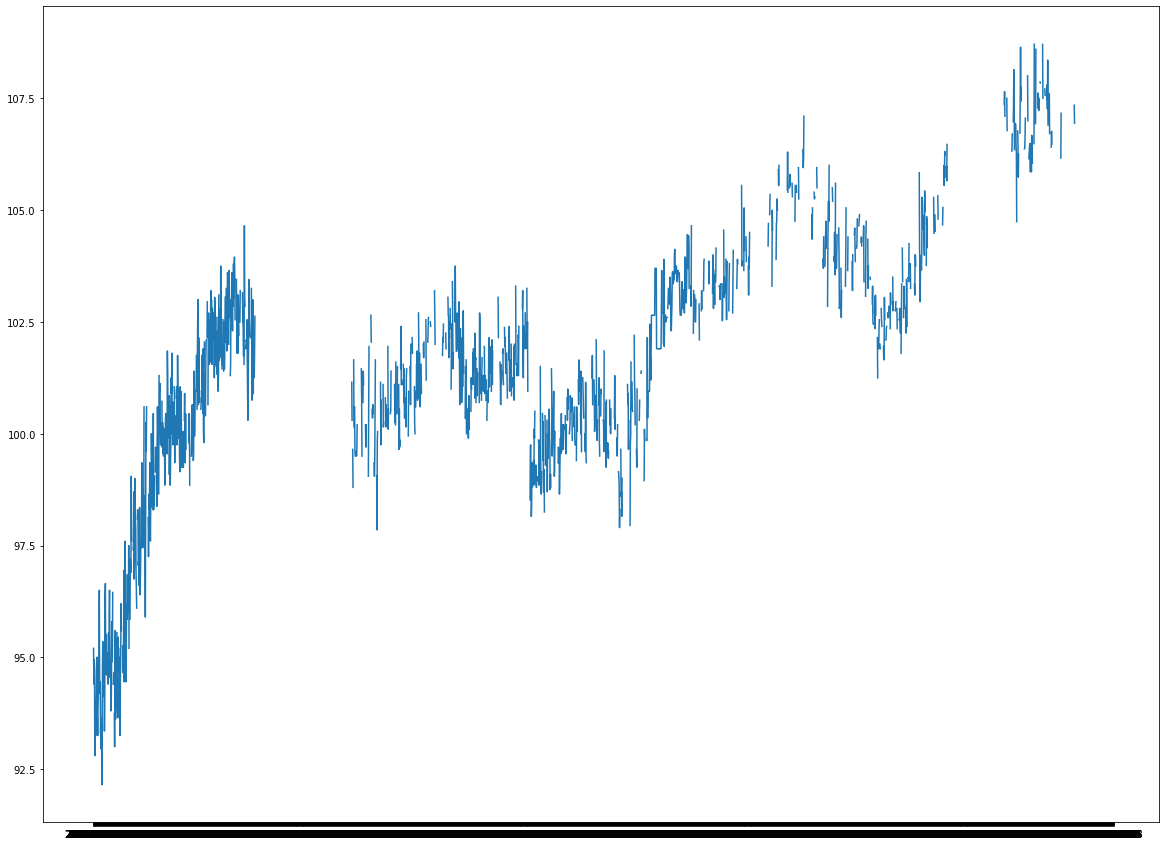

In [31]:
plt.figure(figsize=(20,15))
plt.plot(df['Date'], df['Average weight (kg)'])
plt.show()

## Sleep

In [32]:
filterForLabels(corr_fit_filtered, 'sleepSumHours')

C:\Users\igoej\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:2940: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
C:\Users\igoej\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3357: PerformanceWarning: indexing past lexsort depth may impact performance.
  if (await self.run_code(code, result,  async_=asy)):


""


In [33]:
filterForLabels(corr_fit_filtered, 'Deep sleeping duration (ms)')

C:\Users\igoej\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:2940: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
C:\Users\igoej\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3357: PerformanceWarning: indexing past lexsort depth may impact performance.
  if (await self.run_code(code, result,  async_=asy)):


""


In [34]:
filterForLabels(corr_fit_filtered, 'Light sleeping duration (ms)')

C:\Users\igoej\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:2940: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
C:\Users\igoej\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3357: PerformanceWarning: indexing past lexsort depth may impact performance.
  if (await self.run_code(code, result,  async_=asy)):


""


In [37]:
#print('Sleep:', AverageFunction(df['sleepSumHours'],2))
#print('Sleep (Median):', MedianFunction(df['sleepSumHours'], 2))

In [38]:
#plt.figure(figsize=(20,15))
#sns.regplot(x='sleepSumHours', y='rowingMachineMinutesShifted', data=df)
#plt.ylim(10,)

## Activity

In [39]:
filterForLabels(corr_fit_filtered, 'distanceShifted')

C:\Users\igoej\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:2940: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


,Corr
basketballMinutes,0.319891
heartPointsShifted,0.504806
moveMinutesCountShifted,0.828049


In [40]:
filterForLabels(corr_fit_filtered, 'rowingMachineMinutesShifted')

C:\Users\igoej\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:2940: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
C:\Users\igoej\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3357: PerformanceWarning: indexing past lexsort depth may impact performance.
  if (await self.run_code(code, result,  async_=asy)):


,Corr
basketballMinutesShifted,-0.705547
moveMinutesCountShifted,0.384846
heartPointsShifted,0.558203


In [41]:
filterForLabels(corr_fit_filtered, 'basketballMinutesShifted')

C:\Users\igoej\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:2940: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


,Corr
rowingMachineMinutesShifted,-0.705547
moveMinutesCountShifted,0.341830
Heart Points,0.337191
Average diastolic blood pressure (mmHg),0.366380


In [42]:
filterForLabels(corr_fit_filtered, 'moveMinutesCountShifted')

C:\Users\igoej\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:2940: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


,Corr
rowingMachineMinutesShifted,0.384846
distanceShifted,0.828049
basketballMinutesShifted,0.341830
heartPointsShifted,0.786983


In [43]:
filterForLabels(corr_fit_filtered, 'heartPointsShifted')

C:\Users\igoej\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:2940: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


,Corr
distanceShifted,0.504806
rowingMachineMinutesShifted,0.558203
moveMinutesCountShifted,0.786983
